## Introduction to Deep Learning in Python

In this chapter, you'll become familiar with the fundamental concepts and terminology used in deep learning, and understand why deep learning techniques are so powerful today. You'll build simple neural networks and generate predictions with them. This is the Summary of lecture "Introduction to Deep Learning in Python", via datacamp.


## Basics of deep learning and neural networks - Chapter 1

Interactions

Neural Networks account for interactions really well

Deep Learning uses especially powerful neural networks

Text, Images, Videos, Audio, Source Code, etc..

Imagine you work for a bank, and you need to build a model predicting how many transactions each customer will make next year. You have predictive data or features like each customer’s age, bank balance, whether they are retired, and so on. We'll get to deep learning in a moment, but for comparison, consider how a simple linear regression model works for this problem. The linear regression embeds an assumption that the outcome, in this case how many transactions a user makes, is the sum of individual parts. It starts by saying, "what is the average?" Then it adds the effect of age. Then the effect of bank balance. And so on. So the linear regression model isn't identifying the interactions between these parts, and how they affect banking activity.

 -  Example as seen by linear regression
Say we plot predictions from this model.


 -  Example as seen by linear regression
We draw one line with the predictions for retired people,


 -  Example as seen by linear regression
and another with the predictions for those still working.


 -  Example as seen by linear regression
We put current bank balance on the horizontal axis, and the


 -  Example as seen by linear regression
vertical axis is the predicted number of transactions.


 -  Example as seen by linear regression
The left graph shows predictions from a model with no interactions. In that model we simply add up the effect of the retirement status, and current bank balance. The lack of interactions is reflected by both lines being parallel. That's probably unrealistic, but it's an assumption of the linear regression model.

 -  Example as seen by linear regression
The graph on the right shows the predictions from a model that allows interactions, and the lines don't need to be parallel. Neural networks are a powerful


 -  Interactions
modeling approach that accounts for interactions like this especially well. Deep learning, the focus of this course, is the use of especially powerful neural networks. Because deep learning models account for these types of interactions so well, they perform great on most prediction problems you've seen before. But their ability to capture extremely complex interactions also allow them to do amazing things with text, images, videos, audio, source code and almost anything else you could imagine doing data science with.


 -  Course structure
The first two chapters of this course focus on conceptual knowledge about deep learning. This part will be hard, but it will prepare you to debug and tune deep learning models on conventional prediction problems, and it will lay the foundation for progressing towards those new and exciting applications. You'll see this pay off in the third and fourth chapter.


 -  Build and tune deep learning models using keras
You will write code that looks like this, to build and tune deep learning models using keras, to solve many of the same modeling problems you might have previously solved with scikit-learn. As a start to how deep learning models capture interactions and achieve these amazing results, we'll modify the diagram you saw a moment ago.



In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)
from sklearn.metrics import mean_squared_error

#### Q: Comparing neural network models to classical regression models
Which of the models in the diagrams has greater ability to account for interactions?
![](img1.png)
Answer: Model 2. Model 2 has more nodes in the hidden layer, and therefore, greater ability to capture interactions.

### Forward propagation
- Forward propagation
    - Multiply - add process
    - Dot product
    - Forward propagation for one data at a time
    - Output is the prediction for that data point

# Coding the forward propagation algorithm
In this exercise, you'll write code to do forward propagation (prediction) for your first neural network:

![](img2.png)

Each data point is a customer. The first input is how many accounts they have, and the second input is how many children they have. The model will predict how many transactions the user makes in the next year. You will use this data throughout the first 2 chapters of this course.

The input data has been pre-loaded as `input_data`, and the `weights` are available in a dictionary called weights. The array of weights for the first node in the hidden layer are in `weights['node_0']`, and the array of weights for the second node in the hidden layer are in` weights['node_1']`.

The weights feeding into the output node are available in` weights['output']`.

NumPy will be pre-imported for you as np in all exercises.

In [9]:
input_data = np.array([3, 5])
weights = {"node_0" : np.array([2, 4]),
          "node_1" : np.array([4, -5]),
          "output": np.array([2, 7])}

In [10]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights["node_1"]).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)

-39


 note: It looks like the network generated a prediction of -39.

####  Activation functions

1. Activation functions

But creating this multiply-add-process is only half the story for hidden layers. For neural networks to achieve their maximum predictive power, we must apply something called an activation function in the hidden layers.

2. Linear vs Nonlinear Functions

An activation function allows the model to capture non-linearities. Non-linearities, as shown on the right here, capture patterns like how going from no children to one child may impact your banking transactions differently than going from three children to four. We have examples of linear functions, straight lines on the left, and non-linear functions on the right. If the relationships in the data aren’t straight-line relationships, we will need an activation function that captures non-linearities.

3. Activation functions

An activation function is something applied to the value coming into a node, which then transforms it into the value stored in that node, or the node output.

4. Improving our neural network

Let's go back to the previous diagram. The top hidden node previously had a value of 5. For a long time, an s-shaped function called tanh was a popular activation function.

![](img3.png)

 5. Activation functions
If we used the tanh activation function, this node's value would be tanh(5), which is very close to 1.Today, the standard in both industry and research applications is something called

6. ReLU (Rectified Linear Activation)

the ReLU or rectified linear activation function. That's depicted here. Though it has two linear pieces, it's surprisingly powerful when composed together through multiple successive hidden layers, which you will see soon. The code that incorporates activation functions is shown here. It is the same as the code you saw previously, but we've distinguished the input from the output in each node, which is shown in these lines and then again here And we've applied the tanh function to convert the input to the output. That gives us a prediction of 1-point-2 transactions.

![](img4.png)





#### The Rectified Linear Activation Function
As Dan explained to you in the video, an "activation function" is a function applied at each node. It converts the node's input into some output.

The rectified linear activation function `(called ReLU)` has been shown to lead to very high-performance networks. This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.

Here are some examples:
`relu(3) = 3`
`relu(-3) = 0`

 - Fill in the definition of the relu() function:
 - Use the max() function to calculate the value for the output of relu().
 - Apply the relu() function to node_0_input to calculate node_0_output.
 - Apply the relu() function to node_1_input to calculate node_1_output.

In [15]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights["node_0"]).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights["node_1"]).sum()
node_1_output = relu(node_1_input)


# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights["output"]).sum()
print(model_output)


52


note: You predicted 52 transactions. Without this activation function, you would have predicted a negative number! The real power of activation functions will come soon when you start tuning model weights.

# Applying the network to many observations/rows of data
You'll now define a function called `predict_with_network()` which will generate predictions for multiple data observations, which are pre-loaded as `input_data`. As before, `weights` are also pre-loaded. In addition, the `relu()` function you defined in the previous exercise has been pre-loaded.

 - Define a function called `predict_with_network()` that accepts two arguments - `input_data_row` and `weights` - and returns a prediction from the network as the output.
 - Calculate the input and output values for each node, storing them as: `node_0_input`, `node_0_output`, `node_1_input`, and `node_1_output`.
 - To calculate the input value of a node, multiply the relevant arrays together and compute their sum.
 - To calculate the output value of a node, apply the `relu()` function to the input value of the node.
 - Calculate the model output by calculating `input_to_final_layer` and `model_output` in the same way you calculated the input and output values for the nodes.
 - Use a for loop to iterate over input_data:
 - Use your `predict_with_network()` to generate predictions for each row of the input_data - `input_data_row`. Append each prediction to results.

#### Applying the network to many observations/rows of data
You'll now define a function called `predict_with_network()` which will generate predictions for multiple data observations, which are `pre-loaded` as input_data. As before, weights are also `pre-loaded`. In addition, the `relu()` function you defined in the previous exercise has been `pre-loaded`.

 - Define a function called `predict_with_network()` that accepts two arguments - `input_data_row` and `weights` - and returns a prediction from the network as the output.
 - Calculate the input and output values for each node, storing them as: `node_0_input, node_0_output, node_1_input, and node_1_output`.
 - To calculate the input value of a node, multiply the relevant arrays together and compute their sum.
 - To calculate the output value of a node, apply the `relu()` function to the input value of the node.
 - Calculate the model output by calculating `input_to_final_layer` and `model_output` in the same way you calculated the input and output values for the nodes.
 - Use a for loop to iterate over input_data:
 - Use your `predict_with_network()` to generate predictions for each row of the `input_data` - `input_data_row`. Append each prediction to results.

In [24]:
input_data = [np.array([3, 5]), np.array([ 1, -1]), 
              np.array([0, 0]), np.array([8, 4])]

In [27]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):
    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)
    
    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)
    
    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)

# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))
    
# Print results
print(results)

[52, 63, 0, 148]


#### Forward propagation in a deeper network
You now have a model with 2 hidden layers. The values for an input data point are shown inside the input nodes. The weights are shown on the edges/lines. What prediction would this model make on this data point?

Assume the activation function at each node is the identity function. That is, each node's output will be the same as its input. So the value of the bottom node in the first hidden layer is -1, and not 0, as it would be if the ReLU activation function was used.

![](img5.png)

note: its zero.

#### Multi-layer neural networks
In this exercise, you'll write code to do forward propagation for a neural network with 2 hidden layers. Each hidden layer has two nodes. The input data has been preloaded as input_data. The nodes in the first hidden layer are called `node_0_0` and `node_0_1`. Their weights are pre-loaded as `weights['node_0_0']` and `weights['node_0_1']` respectively.

The nodes in the second hidden layer are called `node_1_0` and `node_1_1`. Their weights are pre-loaded as `weights['node_1_0']` and `weights['node_1_1']` respectively.

We then create a model output from the hidden nodes using `weights` pre-loaded as `weights['output']`.

![](img6.png)

 - Calculate `node_0_0_input` using its weights `weights['node_0_0']` and the given input_data. Then apply the `relu()` function to get `node_0_0_output`.
 
 - Do the same as above for `node_0_1_input` to get `node_0_1_output`.
 
 - Calculate `node_1_0_input` using its weights `weights['node_1_0']` and the outputs from the first `hidden layer - hidden_0_outputs`. Then apply the `relu()` function to get `node_1_0_output`.
 
 - Do the same as above for `node_1_1_inpu`t to get `node_1_1_output`.
 
 - Calculate model_output using its weights `weights['output']` and the outputs from the second `hidden layer hidden_1_outputs` array. Do not apply the `relu()` function to this output.


In [30]:
input_data = np.array([3, 5])
weights = {"node_0_0": np.array([2, 4]),
          "node_0_1": np.array([4, -5]),
          "node_1_0": np.array([-1, 1]),
          "node_1_1": np.array([2, 2]),
          "output": np.array([2, 7])}
          

In [31]:
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights["node_0_0"]).sum()
    node_0_0_output = relu(node_0_0_input)
    
    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights["node_0_1"]).sum()
    node_0_1_output = relu(node_0_1_input)
    
    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (input_data * weights["node_1_0"]).sum()
    node_1_0_output = relu(node_1_0_input)
    
    # Calculate node 1 in the second hidden layer
    node_1_1_input = (input_data * weights["node_1_1"]).sum()
    node_1_1_output = relu(node_1_1_input)
    
    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])
    
    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights["output"]).sum()
    # Return model_output
    return model_output

output = predict_with_network(input_data)
print(output)
    
    
    
    
    

116


#### Question: Representations are learned

How are the weights that determine the features/interactions in Neural Networks created?

Ans: The model training process sets them to optimize predictive accuracy.

#### Question: Levels of representation

Which layers of a model capture more complex or "higher level" interactions?

Answer: The last layers capture the most complex interactions.

# Chapter 2: Optimizing a neural network with backward propagation

Making accurate predictions gets harder with multiple points. First of all, at any set of weights, we have many values of the error, corresponding to the many points we make predictions for. We use something called a loss function to aggregate all the errors into a single measure of the model's predictive performance.

a common loss function for regression tasks is mean-squared error. You square each error,and take the average of that as a measure of model quality. The loss function aggregates all of the errors into a single score. 

 - Loss function
 
Lower values mean a better model, so our goal is to find the weights giving the lowest value for the loss function. We do this with an algorithm called gradient descent. An analogy may be helpful.

#### The need for optimization
- Predictions with multiple points
    - Making accurate predictions gets harder with more points
    - At any set of weights, there are many values of the error corresponding to the many points we make predictions for
- Loss function
    - Aggregates errors in predictions from many data points into single number
    - Measure of model's predictive performance
    - Lower loss function value means a better model
    - Goal: Find the weights that give the lowest value for the loss function
        - Gradient Descent
- Graduent Descent
    - start at random point
    - Until you are somewhere flat:
        - Find the slop
        - Take a step downhill

#### Calculating model errors
For the exercises in this chapter, you'll continue working with the network to predict transactions for a bank.

What is the error (predicted - actual) for the following network using the ReLU activation function when the input data is [3, 2] and the actual value of the target (what you are trying to predict) is 5? It may be helpful to get out a pen and piece of paper to calculate these values.

![](img7.png)

 `3*2=6, 2*1=2 ==> 6+2 =8 (hidden top)`
 
`3*0=0, 2*0=0 ==> 0 (hidden bottom)`

`output 1 = 8*2 = 16`

`output2 = 0*2 = 0`

final output = 16+0 = 16 = predicted value


Actual - predicted = 5 -16 = -11
note: The network generates a prediction of 16, which results in an error of 11.

In [36]:
input_data = np.array([3, 5])
weights = {"node_0" : np.array([2.01, 0]),
          "node_1" : np.array([1, 0]),
          "output": np.array([2, 2])}

In [ ]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights["node_1"]).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)

note:  Increasing the weight to 2.01  making the predictions less accurate.

#### Coding how weight changes affect accuracy
Now you'll get to change weights in a real network and see how they affect model accuracy!

Have a look at the following neural network:

![](img8.png)
Its weights have been pre-loaded as `weights_0`. Your task in this exercise is to update a single weight in `weights_0` to create `weights_1`, which gives a perfect prediction (in which the predicted value is equal to `target_actual: 3`).

Use a pen and paper if necessary to experiment with different combinations. You'll use the `predict_with_network()` function, which takes an array of data as the first argument, and `weights` as the second argument.

 - Create a dictionary of weights called `weights_1` where you have changed 1 weight from `weights_0` (You only need to make 1 edit to `weights_0` to generate the perfect prediction).
 - Obtain predictions with the new weights using the `predict_with_network()` function with `input_data` and `weights_1`.
 - Calculate the error for the new weights by subtracting `target_actual` from `model_output_1`.
Hit '`Submit Answer`' to see how the errors compare!

In [40]:
def relu(input):
    '''Define your relu activatino function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculate
    return output

In [41]:
def predict_with_network(input_data_point, weights):
    node_0_input = (input_data_point * weights['node_0']).sum()
    node_0_output = relu(node_0_input)
    
    node_1_input = (input_data_point * weights['node_1']).sum()
    node_1_output = relu(node_1_input)
    
    hidden_layer_values = np.array([node_0_output, node_1_output])
    input_to_final_layer = (hidden_layer_values * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    return(model_output)

In [44]:
# The data point you will make a prediction for
input_data = np.array([0, 3])
# Sample weights
weights_0 = {"node_0" : np.array([2, 1]),
          "node_1" : np.array([1, 2]),
          "output": np.array([1, 1])}
# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {"node_0" : np.array([2, 1]),
          "node_1" : np.array([1, 2]),
          "output": np.array([1, 0])}

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_0
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


note: The network now generates a perfect prediction with an error of 0

#### Scaling up to multiple data points
You've seen how different weights will have different accuracies on a single prediction. But usually, you'll want to measure model accuracy on many points. You'll now write code to compare model accuracies for two different sets of weights, which have been stored as `weights_0` and `weights_1`.

input_data is a list of arrays. Each item in that list contains the data to make a single prediction. `target_actuals` is a list of numbers. Each item in that list is the actual value we are trying to predict.

In this exercise, you'll use the `mean_squared_error()` function from `sklearn.metrics`. It takes the true values and the predicted values as arguments.

You'll also use the preloaded `predict_with_network()` function, which takes an array of data as the first argument, and weights as the second argument.

 - Import `mean_squared_error` from `sklearn.metrics`.
 
 - Using a `for loop` to iterate over each row of `input_data`:
 
 - Make predictions for each row with `weights_0` using the `predict_with_network()` function and append it to `model_output_0`.
 
 - Do the same for `weights_1`, appending the predictions to `model_output_1`.
 
 - Calculate the `mean squared error of` `model_output_0` and then `model_output_1` using the `mean_squared_error()` function. 
 The first argument should be the actual values `(target_actuals)`, and the second argument should be the predicted values `(model_output_0 or model_output_1)`.

In [46]:
weights_0 = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}
weights_1 = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 1.5]), 'output': np.array([1, 1.5])}
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
target_actuals = [1, 3, 5, 7]

In [47]:
from sklearn.metrics import mean_squared_error
# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

 # Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)
 


Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


note; It looks like model_output_1 has a higher mean squared error.

### Gradient descent
If the slope is positive, going opposite the slope means moving to lower numbers. Subtracting the slope from the current value achieves this. But too big a step might lead us far astray. So, instead of directly subtracting the slope, we multiply the slope by a small number, called the learning rate, and we change the weight by the product of that multiplication. Learning rate are frequently around point-01. This ensures we take small steps, so we reliably move towards the optimal weights. But how do we find the relevant slope for each weight we need to update? Working this out for yourself involves calculus, especially the application of the chain rule. Don't worry if you don't remember or don't know the underlying calculus. We'll explain some basic concepts here, and Keras and TensorFlow do the calculus for us.

- Gradient descent
    - If the slope is positive:
        - Going opposite the slope means moving to lower numbers
        - Subtract the slope from the current value
        - Too big a step might lead us astray
    - Solution: learning rate ($\eta$)
        - Update each weight by subtracting learning rate * slope

#### Calculating slopes
You're now going to practice calculating slopes. When plotting the mean-squared error loss function against predictions, the slope is `2 * x * (xb-y)`, or `2 * input_data * error`. Note that `x and b` may have multiple numbers (x is a vector for each data point, and b is a vector). In this case, the output will also be a vector, which is exactly what you want.

You're ready to write the code to calculate this slope while using a single data point. You'll use pre-defined `weights` called weights as well as data for a single point called `input_data`. The actual value of the target you want to predict is stored in target.

 - Calculate the predictions, `preds`, by multiplying `weights` by the `input_data` and computing their sum.
 - Calculate the `error`, which is `preds minus target`. Notice that this error corresponds to `xb-y` in the gradient expression.
 - Calculate the slope of the loss function with respect to the prediction. To do this, you need to take the product of `input_data` and `error` and `multiply` that by `2`.

In [48]:
weights = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])
target = 0

In [49]:
# Calculate the predictions: preds
preds = (input_data * weights).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = input_data * error * 2

# Print the slope
print(slope)


[14 28 42]


note: You can now use this slope to improve the weights of the model!

#### Improving model weights
Hurray! You've just calculated the slopes you need. Now it's time to use those slopes to improve your model. If you add the `slopes` to your `weights`, you will move in the right direction. However, it's possible to move too far in that direction. So you will want to take a small step in that direction first, using a `lower learning rate`, and verify that the model is improving.

The `weights` have been pre-loaded as weights, the actual value of the target as `target`, and the input data as `input_data`. The predictions from the initial `weights are stored as preds`.

 - Set the `learning rate to be 0.01` and calculate the `error` from the original predictions. This has been done for you.
 - Calculate the `updated weights` by subtracting the product of `learning_rate` and `slope` from `weights`.
 - Calculate the updated predictions by multiplying `weights_updated` with `input_data` and computing their sum.
 - Calculate the `error` for the new predictions. Store the result as `error_updated`.
 - Hit `'Submit Answer'` to compare the updated error to the original!

In [51]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - learning_rate * slope

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


note: Updating the model weights did indeed decrease the error!

#### Making multiple updates to weights
You're now going to make multiple updates so you can dramatically improve your model weights, and see how the predictions improve with each update.

To keep your code clean, there is a `pre-loaded get_slope()` function that takes `input_data`, `targe`t, and `weights` as arguments. There is also a `get_mse()` function that takes the same arguments. The `input_data`, `target`, and `weights` have been pre-loaded.

This network does not have any hidden layers, and it goes directly from the input (with 3 nodes) to an output node. Note that weights is a single array.

We have also pre-loaded `matplotlib.pyplot`, and the error history will be plotted after you have done your gradient descent steps.

- Using a for loop to iteratively update `weights:
- Calculate the slope using the `get_slope()` function.
- Update the weights using a learning rate of `0.01`.
- Calculate the mean squared error `(mse)` with the updated weights using the `get_mse()` function.
- Append mse to `mse_hist`.
- Hit `'Submit Answer'` to visualize mse_hist. What trend do you notice?

In [52]:
def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return error

def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return slope

def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors ** 2)
    return mse

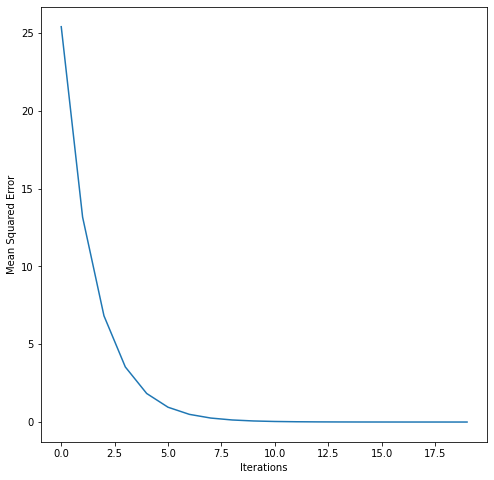

In [53]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

note: As you can see, the mean squared error decreases as the number of iterations go up.

####  -  Backpropagation
You’ve used gradient descent to optimize weights in a simple model. Now we'll add a technique called “back propagation” to calculate the slopes you need to optimize more complex deep learning models.

 -  Backpropagation

Just as forward propagation sends input data through the hidden layers and into the output layer, back propagation takes the error from the output layer and propagates it backward through the hidden layers, towards the input layer. It calculates the necessary slopes sequentially from the weights closest to the prediction, through the hidden layers, eventually back to the weights coming from the inputs. We then use these slopes to update our weights as you've seen. Back propagation is tricky. So you should focus on the general structure of the algorithm, rather than trying to memorize every mathematical detail.

 -  Backpropagation process
In the big picture, we are trying to estimate the slope of the loss function with respect to each weight in our network. You've already seen that we use prediction errors to calculate some of those slopes. So we always do forward propagation to make a prediction and calculate an error before we do back propagation.

Here are the results of forward propagation. Node values are in white and weights are in black. We need to be at this step before we can start back-propagation. Notice, we are using the "relu" activation function. So any node whose input is negative takes a value of 0, and that happens in the top node of the first hidden layer.


For back-propagation, we go back one layer at a time, and each time we go back a layer, we'll use a formula for slopes that you saw in the last video. Every weight feeds from some input node into some output node. The three things we multiply to get the slope for that weight are1, the value at the weights input node.2, the slope from plotting the loss function against that weight's output node.3, the slope of the activation function at the weight's output. We know the value at the node feeding into this weight. Either it is in an input layer, in which case we have it from the data. Or that node is in a hidden layer, in which case we calculated its value when we did forward propagation. The second item on this list is the slope of the loss function with respect to the output node. We do backward propagation from the right side of our diagram to the left. So we already calculated that slope by the time we to plug it into the current calculation. Finally we need the slope of the activation function at the node it feeds into.

  - ReLU Activation Function
 
You can see from this diagram that, for the ReLU function, the slope is 0 if the input into a node is negative. If the input into the node is positive, the output is the same as the input. So the slope would be 1.So far,

 - Backpropagation process
 
we have focused on calculating slopes of the loss function with respect to weights. We also keep track of the slopes of the loss function with respect to node values, because we use those slopes in our calculations of slopes at weights. The slope of the loss function with respect to any node value is the sum of the slopes for every weight coming into that node. -

#### Question: The relationship between forward and backward propagation

If you have gone through 4 iterations of calculating slopes (using backward propagation) and then updated weights, how many times must you have done forward propagation?

Answer: 4. Each time you generate predictions using forward propagation, you update the weights using backward propagation.

#### Question: Thinking about backward propagation

If your predictions were all exactly right, and your errors were all exactly 0, the slope of the loss function with respect to your predictions would also be 0. In that circumstance, which of the following statements would be correct?

Answer: The updates to all weights in the network would also be 0.


- #### Backpropagation
![](img9.png)
    - Allows gradient descent to update all weights in neural network (by getting gradients for all weights)
    - Comes from chain rule of calculus
    - Important to understand the process, but you will generally use a library that implements this
- Backpropagation process
    - Trying to estimate the slope of the loss function w.r.t each weight
    - Do forward propagation to calculate predictions and errors
    - Go back one layer at a time
    - Gradients for weight is product of:
        1. Node value feeding into that weight
        2. Slope of loss function w.r.t node it feeds into
        3. Slope of activation function at the node it feeds into
    - Need to also keep track of the slopes of the loss function w.r.t node values
    - Slope of node values are the sum of the slopes for all weights that come out of them

#### Backpropagation in practice
- Calculating slopes associated with any weight
    - Gradients for weight is product of:
        1. Node value feeding into that weight
        2. Slope of activation function for the node being fed into
        3. Slope of loss function w.r.t output node
- Recap
    - Start at some random set of weights
    - Use forward propagation to make a prediction
    - Use backward propagation to calculate the slope of the loss function w.r.t each weight
    - Multiply that slope by the learning rate, and subtract from the current weights
- Stochastic Gradient descent
    - It is common to calculate slopes on only a subset of the data (a batch)
    - Use a different batch of data to calculate the next update
    - Each time through the training data is called an epoch
    - When slopes are calculated on one batch at a time: stochastic gradient descent